In [94]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [95]:
(X_train, y_train), (X_test,y_test) = datasets.mnist.load_data()
X_train.shape

(60000, 28, 28)

In [96]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [97]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

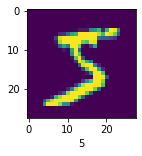

In [98]:
plot_sample(X_train, y_train, 0)

In [99]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [100]:
classes = ["0","1","2","3","4","5","6","7","8","9"]

In [101]:
cnn = models.Sequential([
    layers.Conv2D(filters=28, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [102]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [103]:
cnn.fit(X_train, y_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 65s 34ms/step - loss: 0.1443 - accuracy: 0.9568
Epoch 2/2
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0493 - accuracy: 0.9846


In [116]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.0333 - accuracy: 0.9885


[0.03327379748225212, 0.9884999990463257]

In [104]:
# from PIL import Image
# col = Image.open("7.jpg")
# gray = col.convert('L')
# bw = gray.point(lambda x: 0 if x<100 else 255, '1')
# bw.save("bw_image.jpg")
# bw
# img_array = cv2.imread("bw_image.jpg", cv2.IMREAD_GRAYSCALE)
# img_array = cv2.bitwise_not(img_array)
# print(img_array.size)
# plt.imshow(img_array, cmap = plt.cm.binary)
# plt.show()
# img_size = 28
# new_array = cv2.resize(img_array, (img_size,img_size))
# plt.imshow(new_array, cmap = plt.cm.binary)
# plt.show()
# user_test = tf.keras.utils.normalize(new_array, axis = 1)
# user_test = np.array(user_test).reshape(-1,img_size,img_size,1)
# print(user_test)
# predicted = cnn.predict([user_test])
# a = predicted[0][0]
# for i in range(0,10):
#   b = predicted[0][i]
#   print("Probability Distribution for",i,b)

# print("The Predicted Value is",np.argmax(predicted[0]))

(275, 338)
(28, 28)
(28, 28)


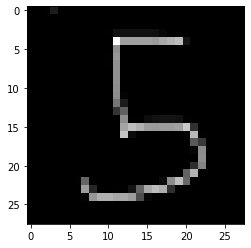

1/1 [==============================] - 0s 74ms/step
(1, 10)
The Predicted Value is 7


In [115]:
import cv2
img = cv2.imread("5.JPG")
img_array = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img_array.shape)
new_array = cv2.resize(img_array, (28,28),interpolation= cv2.INTER_AREA)
print(new_array.shape)
user_test = tf.keras.utils.normalize(new_array, axis = 1)
print(user_test.shape)
user_test = np.array(user_test).reshape(-1,28,28,1)
plt.imshow(new_array, cmap = plt.cm.binary)
plt.show()
predicted = cnn.predict(user_test)
print(predicted.shape)
print("The Predicted Value is",np.argmax(predicted))